# Notebook to create graphics from wandb for thesis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

Specifying some config names for easier grouping

In [3]:
import wandb
api = wandb.Api()

In [4]:
for run_id in ['9oynmbyv','gf6gwu63', 'occ5pfzh', 'oed0n5mf', '8e8mwmga']:
    run = api.run(f"eengel7/multi-label-classification---all-runs/{run_id}")
    run.config["model"] = 'BERT [128]'
    run.update()

In [5]:
for run_id in ['u5u7urqi','gxgvhjnm', 'i39j8spe', 'gg7gsl58', 'zcg4x8jd']:
    run = api.run(f"eengel7/multi-label-classification---all-runs/{run_id}")
    run.config["model"] = 'BERT [512]'
    run.update()

In [6]:
for run_id in ['7ia00cbv','3jsd3izi', 'h4kybrl0', '0wn2u3kr', 'j30agf6z']:
    run = api.run(f"eengel7/multi-label-classification---all-runs/{run_id}")
    run.config["model"] = 'DistilBERT'
    run.update()

In [7]:
for run_id in ['390hb11e','mb7qpsrn', 'wif64lg6', '85w0v0aj', 'psf6dati']:
    run = api.run(f"eengel7/multi-label-classification---all-runs/{run_id}")
    run.config["model"] = 'Logistic Regression'
    run.update()

# Eval loss

In [8]:
# Load the CSV file
report_df = pd.read_csv('/Users/evaengel/comparison_NLP_classification_models/reports/eval_loss.csv')
# Filter the columns and keep only those that don't end with '__MIN' or '__MAX'
filtered_columns = [col for col in report_df.columns if not (col.endswith('__MIN') or col.endswith('__MAX'))]

# Create a new DataFrame with the filtered columns
df = report_df[filtered_columns]
df


,Step,model: BERT [512] - eval_loss,model: BERT [128] - eval_loss,model: DistilBERT - eval_loss,model: Logistic Regression - eval_loss
0,40,0.066765,0.066745,0.060590,0.061488
1,81,0.060259,0.060641,0.047346,0.047033
2,122,0.051331,0.051159,0.043055,0.042427
3,137,0.048723,0.049251,0.042027,0.042563
4,164,0.045645,0.047111,0.040641,0.039553
5,205,0.043395,0.044899,0.039361,0.038271
6,246,0.041575,0.043322,0.038457,0.037069
7,275,0.040920,0.042343,0.037394,0.037412
8,288,0.040669,0.042629,0.037533,0.036796
9,329,0.039800,0.041452,0.037139,0.036647


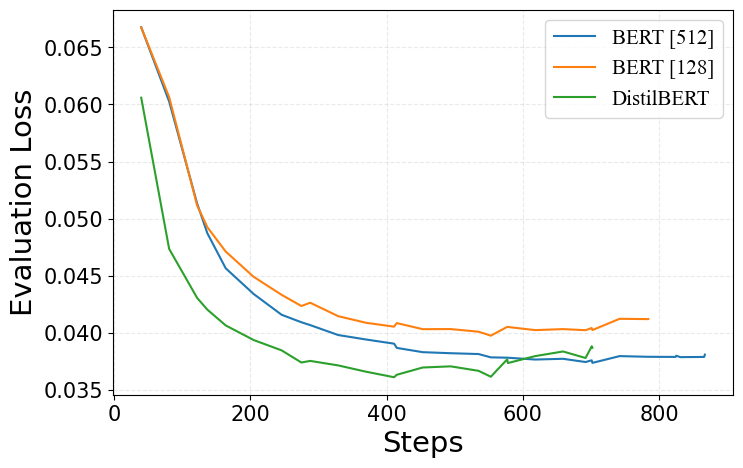

In [9]:
# Colors
colors = {
    'model: BERT [512] - eval_loss': '#1F77B4',
    'model: BERT [128] - eval_loss': '#FF7F0E',
    'model: DistilBERT - eval_loss': '#2CA02C',
}

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.style.use('default')
plt.rc('font',family='Times New Roman') 
plt.grid(visible=True, which='major', color='#999999', linestyle='--', alpha=0.2)

# # Interpolate missing values
# data = df.interpolate(method='linear')
# # Smooth lines using spline interpolation
# x_smooth = np.linspace(data['Step'].min(), data['Step'].max(), 300)


# for column in data.columns:
#     if column != 'Step' and 'Logistic Regression' not in column:
#         plt.plot(data['Step'], data[column], label=column.split(':')[1].strip(), color=colors[column])


# Interpolate missing values using linear interpolation
# Find last valid index for each column
last_valid_index = df.apply(lambda x: x.last_valid_index(), axis=0)
data = df.interpolate(method='linear')
data = df 
for column in data.columns:
    if column != 'Step' and 'Logistic Regression' not in column:

        label=column.split(':')[1].strip()
        valid_data = data.dropna(subset=[column])
        plt.plot(valid_data['Step'], valid_data[column], label=label.split('-')[0].strip(), color=colors[column],)



# for column in data.columns:
#     if column != 'Step' and 'Logistic Regression' not in column:
#         name = label=column.split(':')[1].strip()
#         last_valid = last_valid_index[column]
#         if not np.isnan(last_valid):
#             plt.plot(data['Step'][:last_valid+1], data[column][:last_valid+1], label=label.split('-')[0].strip(), color=colors[column])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Steps', fontsize=21)
plt.ylabel('Evaluation Loss', fontsize=21)
plt.legend(fontsize=15)


plt.savefig('/Users/evaengel/comparison_NLP_classification_models/reports/figures/eval_loss.pdf', bbox_inches='tight')
plt.show()

# Run time

In [10]:
# Load the CSV file
report_df = pd.read_csv('/Users/evaengel/comparison_NLP_classification_models/reports/run_time.csv')
report_df


,Name,model,_wandb,Relative Time (Process)
0,bert-base-uncased_46,BERT [512],NaN,36.260679
1,bert-base-uncased_45,BERT [512],NaN,4704.396740
2,bert-base-uncased_128_46,BERT [128],NaN,3885.487134
3,bert-base-uncased_128_45,BERT [128],NaN,3559.602161
4,bert-base-uncased_44,BERT [512],NaN,8726.245640
5,bert-base-uncased_128_44,BERT [128],NaN,3914.573489
6,bert-base-uncased_128_43,BERT [128],NaN,6536.115619
7,bert-base-uncased_128_42,BERT [128],NaN,6562.802351
8,bert-base-uncased_43,BERT [512],NaN,9784.305773
9,distilbert-base-uncased_46,DistilBERT,NaN,4944.054581


# F1-Score all levels

In [11]:
# Load the CSV file
report_df = pd.read_csv('/Users/evaengel/comparison_NLP_classification_models/reports/wandb_export_f1.csv')

# Filter the columns and keep only those that don't end with '__MIN' or '__MAX'
filtered_columns = [col for col in report_df.columns if not (col.endswith('__MIN') or col.endswith('__MAX'))]

# Create a new DataFrame with the filtered columns
df = report_df[filtered_columns]


In [12]:
df

,Step,bert-base-uncased_46 - test_f1_score_avg,bert-base-uncased_45 - test_f1_score_avg,bert-base-uncased_128_46 - test_f1_score_avg,bert-base-uncased_128_45 - test_f1_score_avg,bert-base-uncased_44 - test_f1_score_avg,bert-base-uncased_128_44 - test_f1_score_avg,bert-base-uncased_128_43 - test_f1_score_avg,bert-base-uncased_128_42 - test_f1_score_avg,bert-base-uncased_43 - test_f1_score_avg,...,bert-base-uncased_42 - test_f1_score_avg,distilbert-base-uncased_45 - test_f1_score_avg,distilbert-base-uncased_44 - test_f1_score_avg,distilbert-base-uncased_43 - test_f1_score_avg,distilbert-base-uncased_42 - test_f1_score_avg,logistic_regression_46 - test_f1_score_avg,logistic_regression_45 - test_f1_score_avg,logistic_regression_44 - test_f1_score_avg,logistic_regression_43 - test_f1_score_avg,logistic_regression_42 - test_f1_score_avg
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.513774,0.509712,0.513533,0.512729,0.511224
1,580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.550014,0.562757,0.559548,NaN,NaN,NaN,NaN,NaN,NaN
2,704,NaN,NaN,NaN,0.519119,NaN,NaN,0.514,0.503299,0.543976,...,NaN,NaN,NaN,NaN,0.56077,NaN,NaN,NaN,NaN,NaN
3,786,NaN,NaN,0.514627,NaN,NaN,0.512163,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,827,0.539389,NaN,NaN,NaN,0.5418,NaN,NaN,NaN,NaN,...,0.5354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,869,NaN,0.55415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Extract the classifier names
classifiers = ['logistic_regression', 'bert-base-uncased_128', 'bert-base-uncased', 'distilbert-base-uncased']

# Initialize dictionaries to store mean and standard deviation values
mean_scores = {}
std_scores = {}
data = list()
# Calculate mean and standard deviation for each classifier
for classifier in classifiers:
    columns = list()
    for random_seed in range(42,47,1):
        column = [col for col in df.columns if str(col)[:-20] == f'{classifier}_{random_seed}' ]
        columns.append(column[0])
    classifier_scores = df[columns].mean(axis=0)

    data.append(classifier_scores.values)
    print(data)
    mean_scores[classifier] = classifier_scores.mean()
    std_scores[classifier] = classifier_scores.std()

mean_values = [mean_scores[classifier] for classifier in classifiers]
std_values = [std_scores[classifier] for classifier in classifiers]

[array([0.51122439, 0.51272937, 0.51353293, 0.50971224, 0.51377372])]
[array([0.51122439, 0.51272937, 0.51353293, 0.50971224, 0.51377372]), array([0.50329892, 0.51400008, 0.51216285, 0.51911879, 0.51462713])]
[array([0.51122439, 0.51272937, 0.51353293, 0.50971224, 0.51377372]), array([0.50329892, 0.51400008, 0.51216285, 0.51911879, 0.51462713]), array([0.53540011, 0.54397636, 0.54180008, 0.55415046, 0.53938877])]
[array([0.51122439, 0.51272937, 0.51353293, 0.50971224, 0.51377372]), array([0.50329892, 0.51400008, 0.51216285, 0.51911879, 0.51462713]), array([0.53540011, 0.54397636, 0.54180008, 0.55415046, 0.53938877]), array([0.56077032, 0.55954815, 0.56275663, 0.55001436, 0.55848087])]


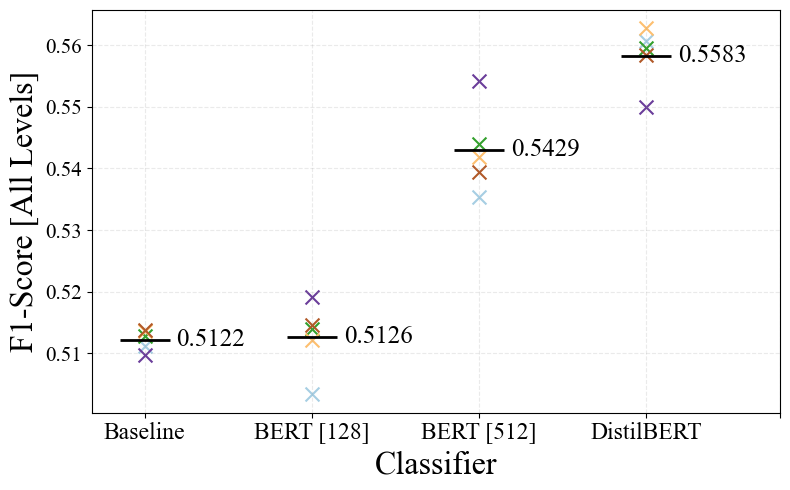

In [14]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.style.use('default')
plt.rc('font',family='Times New Roman') 
plt.grid(visible=True, which='major', color='#999999', linestyle='--', alpha=0.2)

# Create a color gradient from blue to red
colors = np.linspace(0, 1, len(data[0]))
#colors = ['blue', 'green', 'orange', 'purple', 'cyan']
x_lin_space = range(len(classifiers))
x = np.tile(np.arange(1, len(classifiers)+1), (len(data[0]), 1))

for k in range(len(classifiers)):
    for i, d in enumerate(data[k]):
        plt.scatter(k, d, c=colors[i], cmap='Paired', vmin=0, vmax=1, marker= 'x', s = 100)

# Plot the average as short horizontal lines
plt.hlines(mean_values, [x -0.15 for x in x_lin_space], [x +0.15 for x in x_lin_space], colors='black', linewidth=2)

# Add the value as text
for i in range(len(mean_values)):
    plt.text(x_lin_space[i]+0.19, mean_values[i], str(round(mean_values[i],4)), fontsize = 18, ha='left', va='center', color='black')

plt.ylabel('F1-Score [All Levels]', fontsize=23)
plt.xlabel('Classifier', fontsize=23)
plt.xticks([0,1,2,3,3.8], fontsize=17, labels = ['Baseline', 'BERT [128]', 'BERT [512]', 'DistilBERT', ''])
plt.yticks(fontsize=15)

# Adjust spacing and margins
# ax.spines["right"].set_position(("outward", 40))
#plt.title('Mean and Standard Deviation of sample-averaged F1-score for Different Classifiers')
plt.tight_layout()

plt.savefig('/Users/evaengel/comparison_NLP_classification_models/reports/figures/F1_score_all.pdf', bbox_inches='tight')
plt.show()

## LRAP


In [15]:
# Load the CSV file
report_df = pd.read_csv('/Users/evaengel/comparison_NLP_classification_models/reports/wandb_export_LRAP.csv')

# Filter the columns and keep only those that don't end with '__MIN' or '__MAX'
filtered_columns = [col for col in report_df.columns if not (col.endswith('__MIN') or col.endswith('__MAX'))]

# Create a new DataFrame with the filtered columns
df = report_df[filtered_columns]


In [16]:
# Load the CSV file
report_df = pd.read_csv('/Users/evaengel/comparison_NLP_classification_models/reports/wandb_export_LRAP.csv')

# Filter the columns and keep only those that don't end with '__MIN' or '__MAX'
filtered_columns = [col for col in report_df.columns if not (col.endswith('__MIN') or col.endswith('__MAX'))]

# Create a new DataFrame with the filtered columns
df = report_df[filtered_columns]


In [17]:
# Extract the classifier names
classifiers = ['logistic_regression','bert-base-uncased_128', 'bert-base-uncased', 'distilbert-base-uncased']

# Initialize dictionaries to store mean and standard deviation values
log_reg =np.array([0.3965, 0.3997 , 0.3982, 0.3964, 0.3947])
mean_scores_LRAP = {'logistic_regression': np.mean(log_reg)}
data = [log_reg]
# Calculate mean and standard deviation for each classifier
for classifier in ['bert-base-uncased_128', 'bert-base-uncased', 'distilbert-base-uncased']:
    columns = list()
    for random_seed in range(42,47,1):
        column = [col for col in df.columns if str(col)[:-12] == f'{classifier}_{random_seed}' ]
        columns.append(column[0])
    classifier_scores = df[columns].mean(axis=0)

    data.append(classifier_scores.values)
    mean_scores_LRAP[classifier] = classifier_scores.mean()
    std_scores[classifier] = classifier_scores.std()

mean_values_LRAP = [mean_scores_LRAP[classifier] for classifier in classifiers]

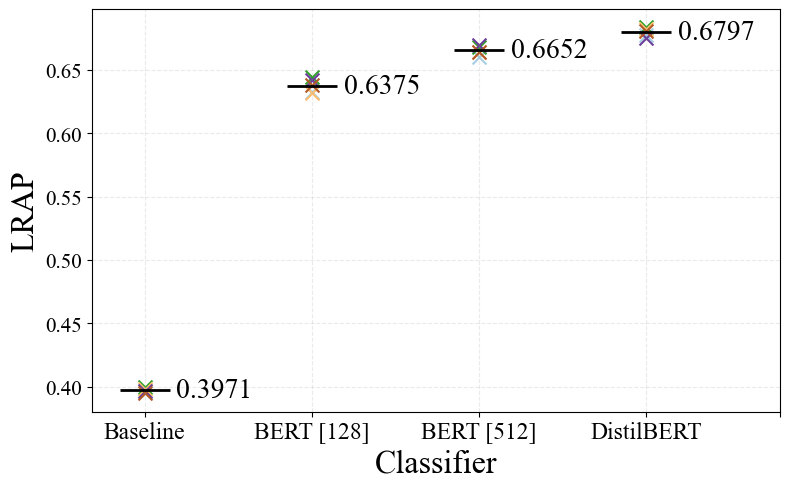

In [18]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.style.use('default')
plt.rc('font',family='Times New Roman') 
plt.grid(visible=True, which='major', color='#999999', linestyle='--', alpha=0.2)

# Create a color gradient from blue to red
colors = np.linspace(0, 1, len(data[0]))
x_lin_space = range(len(classifiers))
x = np.tile(np.arange(1, len(classifiers)+1), (len(data[0]), 1))

for k in range(len(classifiers)):
    for i, d in enumerate(data[k]):
        plt.scatter(k, d, c=colors[i], cmap='Paired', vmin=0, vmax=1, marker= 'x', s = 100)

# Plot the average as short horizontal lines
plt.hlines(mean_values_LRAP, [x -0.15 for x in x_lin_space], [x +0.15 for x in x_lin_space], colors='black', linewidth=2)

# Add the value as text
for i in range(len(mean_values_LRAP)):
    plt.text(x_lin_space[i]+0.19, mean_values_LRAP[i], str(round(mean_values_LRAP[i],4)), fontsize = 20, ha='left', va='center', color='black')

plt.ylabel('LRAP', fontsize=23)
plt.xlabel('Classifier', fontsize=23)
plt.xticks([0,1,2,3,3.8], fontsize=17, labels = ['Baseline', 'BERT [128]', 'BERT [512]', 'DistilBERT', ''])
plt.yticks(fontsize=15)


# Adjust spacing and margins
# ax.spines["right"].set_position(("outward", 40))
#plt.title('Mean and Standard Deviation of sample-averaged F1-score for Different Classifiers')
plt.tight_layout()

plt.savefig('/Users/evaengel/comparison_NLP_classification_models/reports/figures/LRAP.pdf', bbox_inches='tight')
plt.show()

In [19]:
level_1_digit = [1, 2, 3, 4, 5, 6] 
level_3_digits = [101, 102, 103, 104, 105, 106, 107, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 301, 302, 303, 304, 305, 401, 402, 403, 404, 405, 501, 502, 503, 504, 505, 506, 507, 508, 509, 601, 602, 603, 604, 605] 
level_5_digits = [10101, 10102, 10103, 10104, 10105, 10106, 10199, 10201, 10202, 10203, 10204, 10205, 10206, 10207, 10208, 10209, 10299, 10301, 10302, 10303, 10304, 10305, 10306, 10399, 10401, 10402, 10403, 10404, 10405, 10406, 10407, 10499, 10501, 10502, 10503, 10504, 10505, 10506, 10507, 10508, 10509, 10599, 10601, 10602, 10603, 10604, 10605, 10606, 10607, 10608, 10609, 10610, 10611, 10612, 10613, 10614, 10615, 10699, 10799, 20101, 20102, 20103, 20104, 20105, 20106, 20107, 20108, 20199, 20201, 20202, 20203, 20204, 20205, 20206, 20207, 20299, 20301, 20302, 20303, 20304, 20305, 20306, 20307, 20308, 20399, 20401, 20402, 20403, 20404, 20499, 20501, 20502, 20503, 20504, 20505, 20506, 20599, 20601, 20602, 20603, 20604, 20605, 20699, 20701, 20702, 20703, 20704, 20705, 20706, 20707, 20799, 20801, 20802, 20803, 20804, 20899, 20901, 20902, 20903, 20904, 20905, 20906, 20907, 20908, 20999, 21001, 21101, 21102, 21103, 21199, 30101, 30102, 30103, 30104, 30105, 30106, 30107, 30108, 30109, 30110, 30199, 30201, 30202, 30203, 30204, 30205, 30206, 30207, 30208, 30209, 30210, 30211, 30212, 30213, 30214, 30215, 30216, 30217, 30218, 30219, 30220, 30221, 30222, 30223, 30224, 30299, 30301, 30302, 30303, 30304, 30305, 30306, 30307, 30308, 30309, 30310, 30399, 30401, 30402, 30403, 30499, 30501, 30502, 30599, 40101, 40102, 40103, 40104, 40105, 40106, 40107, 40108, 40201, 40301, 40302, 40303, 40304, 40401, 40402, 40501, 40502, 40503, 40504, 40599, 50101, 50102, 50201, 50202, 50203, 50301, 50302, 50303, 50304, 50401, 50402, 50403, 50404, 50501, 50502, 50601, 50602, 50603, 50701, 50702, 50801, 50802, 50803, 50804, 50805, 50901, 50902, 50903, 50904, 50999, 60101, 60102, 60103, 60201, 60202, 60203, 60204, 60301, 60302, 60303, 60304, 60305, 60401, 60402, 60403, 60404, 60405, 60406, 60407, 60408, 60409, 60410, 60501, 60502, 60503, 60599]

print(len(level_1_digit), len(level_3_digits), len(level_5_digits))

6 42 260


# F1- level 1

In [20]:
# Load the CSV file
report_df = pd.read_csv('/Users/evaengel/comparison_NLP_classification_models/reports/f1_avg_1.csv')

# Filter the columns and keep only those that don't end with '__MIN' or '__MAX'
filtered_columns = [col for col in report_df.columns if not (col.endswith('__MIN') or col.endswith('__MAX'))]

# Create a new DataFrame with the filtered columns
df = report_df[filtered_columns]


In [21]:
df

,Step,bert-base-uncased_42 - test_f1_score_avg_1,bert-base-uncased_43 - test_f1_score_avg_1,logistic_regression_44 - test_f1_score_avg_1,logistic_regression_43 - test_f1_score_avg_1,logistic_regression_42 - test_f1_score_avg_1,logistic_regression_45 - test_f1_score_avg_1,bert-base-uncased_44 - test_f1_score_avg_1,logistic_regression_46 - test_f1_score_avg_1,bert-base-uncased_128_42 - test_f1_score_avg_1,...,distilbert-base-uncased_42 - test_f1_score_avg_1,distilbert-base-uncased_46 - test_f1_score_avg_1,distilbert-base-uncased_44 - test_f1_score_avg_1,bert-base-uncased_45 - test_f1_score_avg_1,distilbert-base-uncased_43 - test_f1_score_avg_1,bert-base-uncased_128_44 - test_f1_score_avg_1,bert-base-uncased_128_46 - test_f1_score_avg_1,distilbert-base-uncased_45 - test_f1_score_avg_1,bert-base-uncased_128_45 - test_f1_score_avg_1,bert-base-uncased_46 - test_f1_score_avg_1
0,0,NaN,NaN,0.755349,0.75901,0.739915,0.739602,NaN,0.743808,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.794077,0.796604,NaN,0.797701,NaN,NaN,0.790995,NaN,NaN
2,704,NaN,0.798372,NaN,NaN,NaN,NaN,NaN,NaN,0.765513,...,0.79413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77901,NaN
3,786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.76747,0.776914,NaN,NaN,NaN
4,827,0.786931,NaN,NaN,NaN,NaN,NaN,0.795336,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.792898
5,869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.799934,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Extract the classifier names
classifiers = ['logistic_regression', 'bert-base-uncased_128', 'bert-base-uncased', 'distilbert-base-uncased']

# Initialize dictionaries to store mean and standard deviation values
mean_scores_1 = {}
std_scores_1 = {}
data = list()
# Calculate mean and standard deviation for each classifier
for classifier in classifiers:
    columns = list()
    for random_seed in range(42,47,1):
        column = [col for col in df.columns if str(col)[:-22] == f'{classifier}_{random_seed}' ]
        columns.append(column[0])
    classifier_scores = df[columns].mean(axis=0)

    data.append(classifier_scores.values)
    print(data)
    mean_scores_1[classifier] = classifier_scores.mean()
    std_scores_1[classifier] = classifier_scores.std()

mean_values_1 = [mean_scores_1[classifier] for classifier in classifiers]
std_values = [std_scores_1[classifier] for classifier in classifiers]

[array([0.73991468, 0.75900964, 0.75534864, 0.73960176, 0.74380811])]
[array([0.73991468, 0.75900964, 0.75534864, 0.73960176, 0.74380811]), array([0.76551304, 0.77702834, 0.76747024, 0.77901049, 0.77691421])]
[array([0.73991468, 0.75900964, 0.75534864, 0.73960176, 0.74380811]), array([0.76551304, 0.77702834, 0.76747024, 0.77901049, 0.77691421]), array([0.78693141, 0.79837245, 0.79533617, 0.79993367, 0.79289796])]
[array([0.73991468, 0.75900964, 0.75534864, 0.73960176, 0.74380811]), array([0.76551304, 0.77702834, 0.76747024, 0.77901049, 0.77691421]), array([0.78693141, 0.79837245, 0.79533617, 0.79993367, 0.79289796]), array([0.7941301 , 0.79770096, 0.79660402, 0.79099461, 0.79407748])]


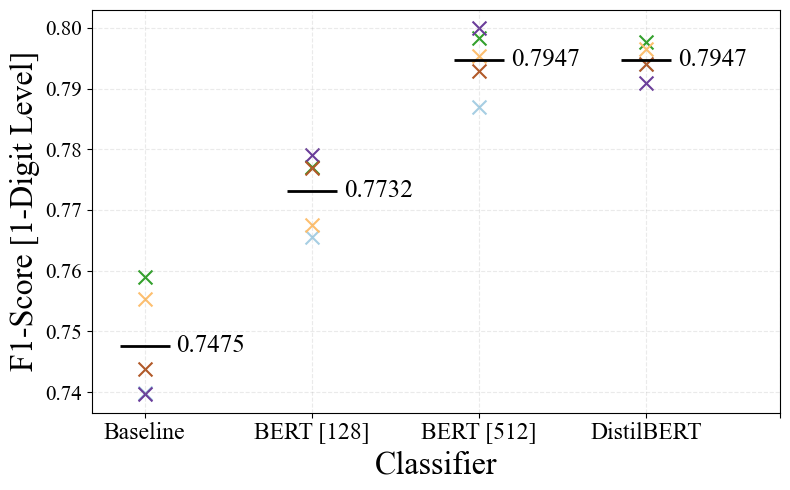

In [23]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.style.use('default')
plt.rc('font',family='Times New Roman') 
plt.grid(visible=True, which='major', color='#999999', linestyle='--', alpha=0.2)

# Create a color gradient from blue to red
colors = np.linspace(0, 1, len(data[0]))
#colors = ['blue', 'green', 'orange', 'purple', 'cyan']
x_lin_space = range(len(classifiers))
x = np.tile(np.arange(1, len(classifiers)+1), (len(data[0]), 1))

for k in range(len(classifiers)):
    for i, d in enumerate(data[k]):
        plt.scatter(k, d, c=colors[i], cmap='Paired', vmin=0, vmax=1, marker= 'x', s = 100)

# Plot the average as short horizontal lines
plt.hlines(mean_values_1, [x -0.15 for x in x_lin_space], [x +0.15 for x in x_lin_space], colors='black', linewidth=2)

# Add the value as text
for i in range(len(mean_values_1)):
    plt.text(x_lin_space[i]+0.19, mean_values_1[i], str(round(mean_values_1[i],4)), fontsize = 18, ha='left', va='center', color='black')

plt.ylabel('F1-Score [1-Digit Level]', fontsize=23)
plt.xlabel('Classifier', fontsize=23)
plt.xticks([0,1,2,3,3.8], fontsize=17, labels = ['Baseline', 'BERT [128]', 'BERT [512]', 'DistilBERT', ''])
plt.yticks(fontsize=15)


# Adjust spacing and margins
# ax.spines["right"].set_position(("outward", 40))
#plt.title('Mean and Standard Deviation of sample-averaged F1-score for Different Classifiers')
plt.tight_layout()

plt.savefig('/Users/evaengel/comparison_NLP_classification_models/reports/figures/avg_1.pdf', bbox_inches='tight')
plt.show()

# F1- level 3


In [24]:
# Load the CSV file
report_df = pd.read_csv('/Users/evaengel/comparison_NLP_classification_models/reports/f1_avg_3.csv')

# Filter the columns and keep only those that don't end with '__MIN' or '__MAX'
filtered_columns = [col for col in report_df.columns if not (col.endswith('__MIN') or col.endswith('__MAX'))]

# Create a new DataFrame with the filtered columns
df = report_df[filtered_columns]


In [25]:
df

,Step,bert-base-uncased_42 - test_f1_score_avg_3,bert-base-uncased_43 - test_f1_score_avg_3,logistic_regression_44 - test_f1_score_avg_3,logistic_regression_43 - test_f1_score_avg_3,logistic_regression_42 - test_f1_score_avg_3,logistic_regression_45 - test_f1_score_avg_3,bert-base-uncased_44 - test_f1_score_avg_3,logistic_regression_46 - test_f1_score_avg_3,bert-base-uncased_128_42 - test_f1_score_avg_3,...,distilbert-base-uncased_42 - test_f1_score_avg_3,distilbert-base-uncased_46 - test_f1_score_avg_3,distilbert-base-uncased_44 - test_f1_score_avg_3,bert-base-uncased_45 - test_f1_score_avg_3,distilbert-base-uncased_43 - test_f1_score_avg_3,bert-base-uncased_128_44 - test_f1_score_avg_3,bert-base-uncased_128_46 - test_f1_score_avg_3,distilbert-base-uncased_45 - test_f1_score_avg_3,bert-base-uncased_128_45 - test_f1_score_avg_3,bert-base-uncased_46 - test_f1_score_avg_3
0,0,NaN,NaN,0.451714,0.449703,0.441984,0.442366,NaN,0.444597,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.504975,0.517599,NaN,0.506572,NaN,NaN,0.491161,NaN,NaN
2,704,NaN,0.483993,NaN,NaN,NaN,NaN,NaN,NaN,0.438705,...,0.508458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.453056,NaN
3,786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.446977,0.441699,NaN,NaN,NaN
4,827,0.472867,NaN,NaN,NaN,NaN,NaN,0.486762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.487927
5,869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.502482,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Extract the classifier names
classifiers = ['logistic_regression', 'bert-base-uncased_128', 'bert-base-uncased', 'distilbert-base-uncased']

# Initialize dictionaries to store mean and standard deviation values
mean_scores_3 = {}
std_scores_3 = {}
data = list()
# Calculate mean and standard deviation for each classifier
for classifier in classifiers:
    columns = list()
    for random_seed in range(42,47,1):
        column = [col for col in df.columns if str(col)[:-22] == f'{classifier}_{random_seed}' ]
        columns.append(column[0])
    classifier_scores = df[columns].mean(axis=0)

    data.append(classifier_scores.values)
    print(data)
    mean_scores_3[classifier] = classifier_scores.mean()
    std_scores_3[classifier] = classifier_scores.std()

mean_values_3 = [mean_scores_3[classifier] for classifier in classifiers]
std_values = [std_scores_3[classifier] for classifier in classifiers]

[array([0.44198394, 0.44970333, 0.45171429, 0.44236602, 0.44459741])]
[array([0.44198394, 0.44970333, 0.45171429, 0.44236602, 0.44459741]), array([0.4387055 , 0.44044454, 0.44697676, 0.45305622, 0.4416987 ])]
[array([0.44198394, 0.44970333, 0.45171429, 0.44236602, 0.44459741]), array([0.4387055 , 0.44044454, 0.44697676, 0.45305622, 0.4416987 ]), array([0.47286716, 0.48399254, 0.48676153, 0.50248233, 0.48792744])]
[array([0.44198394, 0.44970333, 0.45171429, 0.44236602, 0.44459741]), array([0.4387055 , 0.44044454, 0.44697676, 0.45305622, 0.4416987 ]), array([0.47286716, 0.48399254, 0.48676153, 0.50248233, 0.48792744]), array([0.50845805, 0.50657209, 0.51759892, 0.49116071, 0.50497543])]


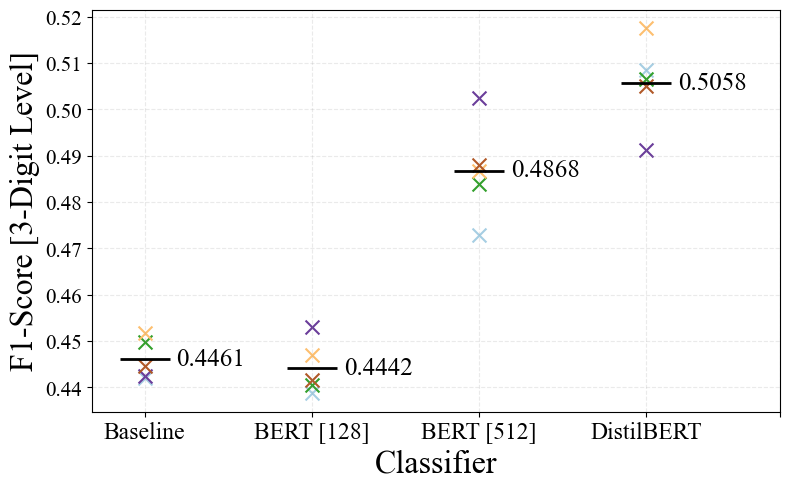

In [27]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.style.use('default')
plt.rc('font',family='Times New Roman') 
plt.grid(visible=True, which='major', color='#999999', linestyle='--', alpha=0.2)

# Create a color gradient from blue to red
colors = np.linspace(0, 1, len(data[0]))
#colors = ['blue', 'green', 'orange', 'purple', 'cyan']
x_lin_space = range(len(classifiers))
x = np.tile(np.arange(1, len(classifiers)+1), (len(data[0]), 1))

for k in range(len(classifiers)):
    for i, d in enumerate(data[k]):
        plt.scatter(k, d, c=colors[i], cmap='Paired', vmin=0, vmax=1, marker= 'x', s = 100)

# Plot the average as short horizontal lines
plt.hlines(mean_values_3, [x -0.15 for x in x_lin_space], [x +0.15 for x in x_lin_space], colors='black', linewidth=2)

# Add the value as text
for i in range(len(mean_values_3)):
    plt.text(x_lin_space[i]+0.19, mean_values_3[i], str(round(mean_values_3[i],4)), fontsize = 18, ha='left', va='center', color='black')

plt.ylabel('F1-Score [3-Digit Level]', fontsize=23)
plt.xlabel('Classifier', fontsize=23)
plt.xticks([0,1,2,3,3.8], fontsize=17, labels = ['Baseline', 'BERT [128]', 'BERT [512]', 'DistilBERT', ''])
plt.yticks(fontsize=15)


# Adjust spacing and margins
# ax.spines["right"].set_position(("outward", 40))
#plt.title('Mean and Standard Deviation of sample-averaged F1-score for Different Classifiers')
plt.tight_layout()

plt.savefig('/Users/evaengel/comparison_NLP_classification_models/reports/figures/avg_3.pdf', bbox_inches='tight')
plt.show()

# F1- level 5


In [28]:
# Load the CSV file
report_df = pd.read_csv('/Users/evaengel/comparison_NLP_classification_models/reports/f1_avg_5.csv')

# Filter the columns and keep only those that don't end with '__MIN' or '__MAX'
filtered_columns = [col for col in report_df.columns if not (col.endswith('__MIN') or col.endswith('__MAX'))]

# Create a new DataFrame with the filtered columns
df = report_df[filtered_columns]


In [29]:
df

,Step,bert-base-uncased_42 - test_f1_score_avg_5,bert-base-uncased_43 - test_f1_score_avg_5,logistic_regression_44 - test_f1_score_avg_5,logistic_regression_43 - test_f1_score_avg_5,logistic_regression_42 - test_f1_score_avg_5,logistic_regression_45 - test_f1_score_avg_5,bert-base-uncased_44 - test_f1_score_avg_5,logistic_regression_46 - test_f1_score_avg_5,bert-base-uncased_128_42 - test_f1_score_avg_5,...,distilbert-base-uncased_42 - test_f1_score_avg_5,distilbert-base-uncased_46 - test_f1_score_avg_5,distilbert-base-uncased_44 - test_f1_score_avg_5,bert-base-uncased_45 - test_f1_score_avg_5,distilbert-base-uncased_43 - test_f1_score_avg_5,bert-base-uncased_128_44 - test_f1_score_avg_5,bert-base-uncased_128_46 - test_f1_score_avg_5,distilbert-base-uncased_45 - test_f1_score_avg_5,bert-base-uncased_128_45 - test_f1_score_avg_5,bert-base-uncased_46 - test_f1_score_avg_5
0,0,NaN,NaN,0.336584,0.330996,0.323727,0.314592,NaN,0.32263,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.314949,0.310495,NaN,0.304048,NaN,NaN,0.289522,NaN,NaN
2,704,NaN,0.248504,NaN,NaN,NaN,NaN,NaN,NaN,0.206252,...,0.31406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.224306,NaN
3,786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.232309,0.223067,NaN,NaN,NaN
4,827,0.256235,NaN,NaN,NaN,NaN,NaN,0.251699,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.246357
5,869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.280164,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Extract the classifier names
classifiers = ['logistic_regression', 'bert-base-uncased_128', 'bert-base-uncased', 'distilbert-base-uncased']

# Initialize dictionaries to store mean and standard deviation values
mean_scores_5 = {}
std_scores_5 = {}
data = list()
# Calculate mean and standard deviation for each classifier
for classifier in classifiers:
    columns = list()
    for random_seed in range(42,47,1):
        column = [col for col in df.columns if str(col)[:-22] == f'{classifier}_{random_seed}' ]
        columns.append(column[0])
    classifier_scores = df[columns].mean(axis=0)

    data.append(classifier_scores.values)
    print(data)
    mean_scores_5[classifier] = classifier_scores.mean()
    std_scores_5[classifier] = classifier_scores.std()

mean_values_5 = [mean_scores_5[classifier] for classifier in classifiers]
std_values_5 = [std_scores_5[classifier] for classifier in classifiers]

[array([0.32372742, 0.3309959 , 0.33658437, 0.31459185, 0.3226295 ])]
[array([0.32372742, 0.3309959 , 0.33658437, 0.31459185, 0.3226295 ]), array([0.2062518 , 0.22237935, 0.23230933, 0.22430624, 0.22306689])]
[array([0.32372742, 0.3309959 , 0.33658437, 0.31459185, 0.3226295 ]), array([0.2062518 , 0.22237935, 0.23230933, 0.22430624, 0.22306689]), array([0.25623469, 0.24850435, 0.25169938, 0.28016401, 0.2463567 ])]
[array([0.32372742, 0.3309959 , 0.33658437, 0.31459185, 0.3226295 ]), array([0.2062518 , 0.22237935, 0.23230933, 0.22430624, 0.22306689]), array([0.25623469, 0.24850435, 0.25169938, 0.28016401, 0.2463567 ]), array([0.31405965, 0.30404847, 0.31049492, 0.28952192, 0.31494862])]


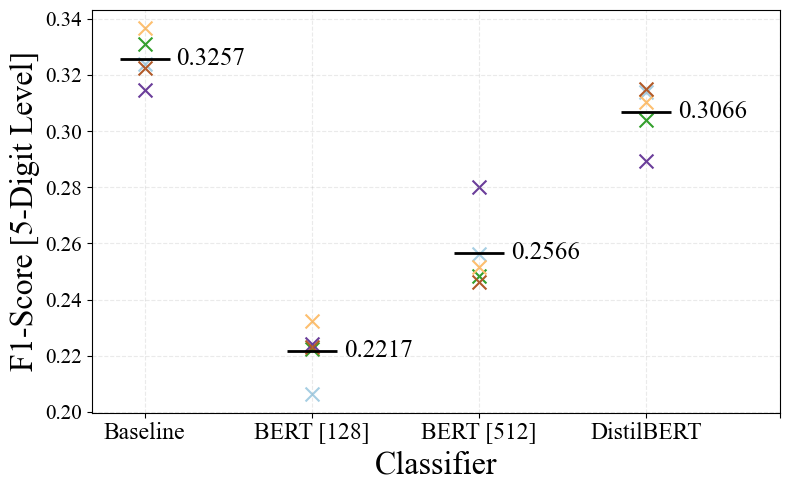

In [31]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.style.use('default')
plt.rc('font',family='Times New Roman') 
plt.grid(visible=True, which='major', color='#999999', linestyle='--', alpha=0.2)

# Create a color gradient from blue to red
colors = np.linspace(0, 1, len(data[0]))
#colors = ['blue', 'green', 'orange', 'purple', 'cyan']
x_lin_space = range(len(classifiers))
x = np.tile(np.arange(1, len(classifiers)+1), (len(data[0]), 1))

for k in range(len(classifiers)):
    for i, d in enumerate(data[k]):
        plt.scatter(k, d, c=colors[i], cmap='Paired', vmin=0, vmax=1, marker= 'x', s = 100)

# Plot the average as short horizontal lines
plt.hlines(mean_values_5, [x -0.15 for x in x_lin_space], [x +0.15 for x in x_lin_space], colors='black', linewidth=2)

# Add the value as text
for i in range(len(mean_values_5)):
    plt.text(x_lin_space[i]+0.19, mean_values_5[i], str(round(mean_values_5[i],4)), fontsize = 18, ha='left', va='center', color='black')

plt.ylabel('F1-Score [5-Digit Level]', fontsize=23)
plt.xlabel('Classifier', fontsize=23)
plt.xticks([0,1,2,3,3.8], fontsize=17, labels = ['Baseline', 'BERT [128]', 'BERT [512]', 'DistilBERT', ''])
plt.yticks(fontsize=15)


# Adjust spacing and margins
# ax.spines["right"].set_position(("outward", 40))
#plt.title('Mean and Standard Deviation of sample-averaged F1-score for Different Classifiers')
plt.tight_layout()

plt.savefig('/Users/evaengel/comparison_NLP_classification_models/reports/figures/avg_5.pdf', bbox_inches='tight')
plt.show()

# All F-Scores in one plot

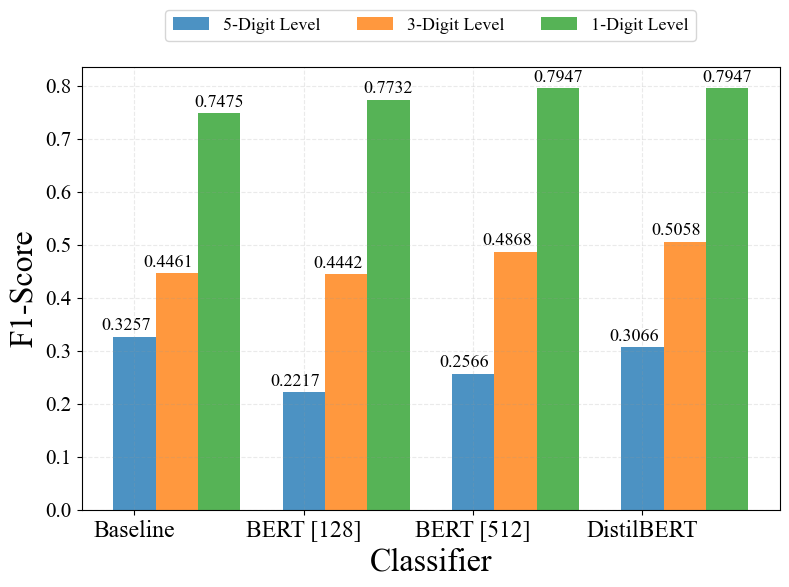

In [32]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
plt.style.use('default')
plt.rc('font', family='Times New Roman')
plt.grid(visible=True, which='major', color='#999999', linestyle='--', alpha=0.2)

# Create a color gradient from blue to red
colors = np.linspace(0, 1, len(data[0]))
x_lin_space = range(len(classifiers))
x = np.tile(np.arange(1, len(classifiers) + 1), (len(data[0]), 1))

# Plot mean_values_5, mean_values_3, and mean_values_1 as vertical bar plots
bar_width = 0.25
plt.bar(x_lin_space, mean_values_5, width=bar_width, label='5-Digit Level', align='center', alpha=0.8)
plt.bar([x + bar_width for x in x_lin_space], mean_values_3, width=bar_width, label='3-Digit Level', align='center', alpha=0.8)
plt.bar([x + 2 * bar_width for x in x_lin_space], mean_values_1, width=bar_width, label='1-Digit Level', align='center', alpha=0.8)

# Add legend
plt.legend(fontsize=15)

# Add the value as text above each bar
for i in range(len(mean_values_5)):
    plt.text(x_lin_space[i] -0.05, mean_values_5[i] + 0.005, str(round(mean_values_5[i], 4)), fontsize=13, ha='center', va='bottom')
    plt.text(x_lin_space[i] -0.05 + bar_width, mean_values_3[i] + 0.005, str(round(mean_values_3[i], 4)), fontsize=13, ha='center', va='bottom')
    plt.text(x_lin_space[i] + 2 * bar_width, mean_values_1[i] + 0.005, str(round(mean_values_1[i], 4)), fontsize=13, ha='center', va='bottom')

# # Plot the average as short horizontal lines
# plt.hlines(mean_values, [x - bar_width for x in x_lin_space], [x + bar_width for x in x_lin_space], colors='black', linewidth=2, linestyle = '--')

# # Add the value as text
# for i in range(len(mean_values)):
#     plt.text(x_lin_space[i]+ bar_width, mean_values[i] + 0.005, str(round(mean_values[i],4)), fontsize = 13, ha='center', va='center', color='red')




plt.ylabel('F1-Score', fontsize=23)
plt.xlabel('Classifier', fontsize=23)

plt.xticks(x_lin_space, fontsize=17, labels = ['Baseline', 'BERT [128]', 'BERT [512]', 'DistilBERT'])
plt.yticks(fontsize=15)
plt.legend(fontsize=13, ncol = 3, bbox_to_anchor=(0.5,1.15), loc='upper center')

# Adjust spacing and margins
plt.tight_layout()

plt.savefig('/Users/evaengel/comparison_NLP_classification_models/reports/figures/avg_all.pdf', bbox_inches='tight')
plt.show()

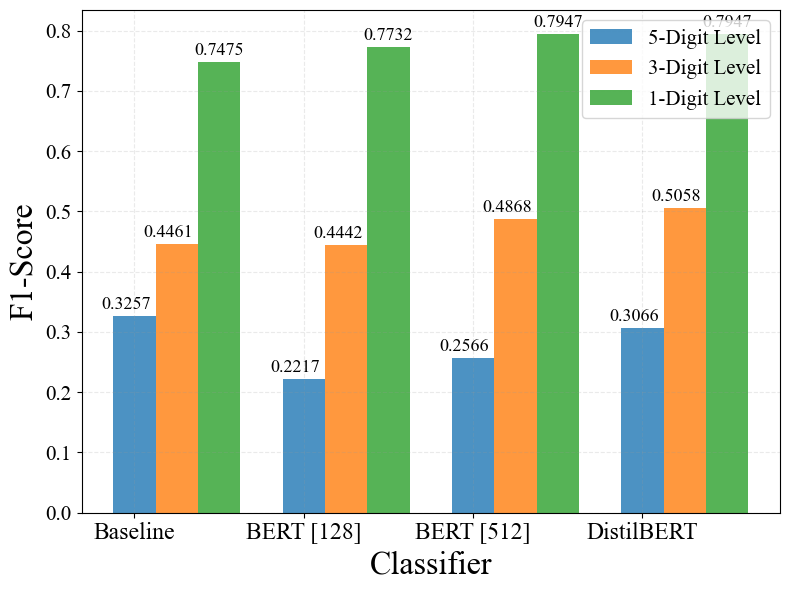

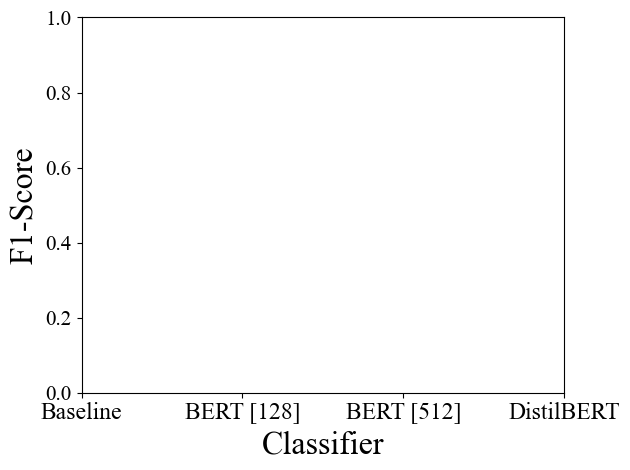

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean of all levels
mean_values = np.mean([mean_values_5, mean_values_3, mean_values_1], axis=0)
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean of all levels
mean_values = np.mean([mean_values_5, mean_values_3, mean_values_1], axis=0)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
plt.style.use('default')
plt.rc('font', family='Times New Roman')
plt.grid(visible=True, which='major', color='#999999', linestyle='--', alpha=0.2)

# Create a color gradient from blue to red
colors = np.linspace(0, 1, len(data[0]))
x_lin_space = range(len(classifiers))
x = np.tile(np.arange(1, len(classifiers) + 1), (len(data[0]), 1))

# Plot mean_values_5, mean_values_3, and mean_values_1 as vertical bar plots
bar_width = 0.25
plt.bar(x_lin_space, mean_values_5, width=bar_width, label='5-Digit Level', align='center', alpha=0.8)
plt.bar([x + bar_width for x in x_lin_space], mean_values_3, width=bar_width, label='3-Digit Level', align='center', alpha=0.8)
plt.bar([x + 2 * bar_width for x in x_lin_space], mean_values_1, width=bar_width, label='1-Digit Level', align='center', alpha=0.8)

# Add legend
plt.legend(fontsize=15)

# Add the value as text above each bar
for i in range(len(mean_values_5)):
    plt.text(x_lin_space[i] -0.05, mean_values_5[i] + 0.005, str(round(mean_values_5[i], 4)), fontsize=13, ha='center', va='bottom')
    plt.text(x_lin_space[i] -0.05 + bar_width, mean_values_3[i] + 0.005, str(round(mean_values_3[i], 4)), fontsize=13, ha='center', va='bottom')
    plt.text(x_lin_space[i] + 2 * bar_width, mean_values_1[i] + 0.005, str(round(mean_values_1[i], 4)), fontsize=13, ha='center', va='bottom')

# # Plot the average as short horizontal lines
# plt.hlines(mean_values, [x - bar_width for x in x_lin_space], [x + 2 * bar_width for x in x_lin_space], colors='black', linewidth=2)

# # Add the value as text
# for i in range(len(mean_values)):
#     plt.text(x_lin_space[i] + 1.5 * bar_width, mean_values[i], str(round(mean_values[i], 4)), fontsize=13, ha='center', va='bottom', color='red')

plt.ylabel('F1-Score', fontsize=23)
plt.xlabel('Classifier', fontsize=23)

plt.xticks(x_lin_space, fontsize=17, labels=['Baseline', 'BERT [128]', 'BERT [512]', 'DistilBERT'])
plt.yticks(fontsize=15)

# Adjust spacing and margins
plt.tight_layout()

plt.savefig('/Users/evaengel/comparison_NLP_classification_models/reports/figures/avg_summary.pdf', bbox_inches='tight')
plt.show()

# # Plot the average as short horizontal lines
# plt.hlines(mean_values, [x - bar_width for x in x_lin_space], [x + 2 * bar_width for x in x_lin_space], colors='black', linewidth=2)

# # Add the value as text
# for i in range(len(mean_values)):
#     plt.text(x_lin_space[i] + 1.5 * bar_width, mean_values[i], str(round(mean_values[i], 4)), fontsize=13, ha='center', va='bottom', color='red')

plt.ylabel('F1-Score', fontsize=23)
plt.xlabel('Classifier', fontsize=23)

plt.xticks(x_lin_space, fontsize=17, labels=['Baseline', 'BERT [128]', 'BERT [512]', 'DistilBERT'])
plt.yticks(fontsize=15)

# Adjust spacing and margins
plt.tight_layout()

plt.savefig('/Users/evaengel/comparison_NLP_classification_models/reports/figures/avg_summary.pdf', bbox_inches='tight')
plt.show()


# Benchmark

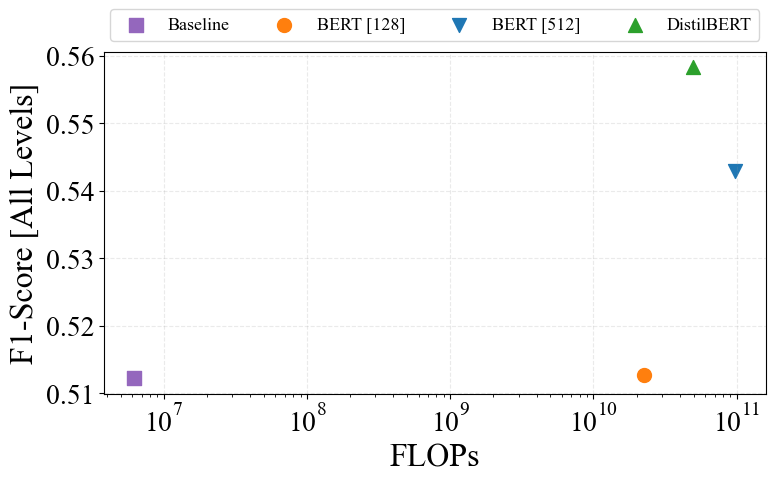

In [39]:
classifier = ['Baseline', 'BERT [128]', 'BERT [512]', 'DistilBERT']
flops_without_embedding = [6193025, 22618931200, 98006597632, 49367335936]
flops_with_embedding = [6193025, 28646440960, 122418626560, 73779364864]
f1 = [ 0.5122, 0.5126, 0.5429, 0.5583]
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.style.use('default')
plt.rc('font',family='Times New Roman') 
plt.grid(visible=True, which='major', color='#999999', linestyle='--', alpha=0.2)

# Create a color gradient from blue to red

# for k in range(len(classifiers)):
#     for i, d in enumerate(data[k]):
#         plt.scatter(k, d, c=colors[i], cmap='Paired', vmin=0, vmax=1, marker= 'x', s = 100)

colors = ['#9467BD', '#FF7F0E', '#1F77B4', '#2CA02C']
markers = ['s', 'o', 'v', '^']

for i in range(len(flops_without_embedding)):
    plt.scatter(flops_without_embedding[i], f1[i], color=colors[i], marker=markers[i], s=100, label=classifier[i])

plt.ylabel('F1-Score [All Levels]', fontsize=23)
plt.xlabel('FLOPs', fontsize=23)
plt.xscale('log')
plt.xticks( fontsize=20)
plt.yticks(fontsize=20)

# Adjust spacing and margins
# ax.spines["right"].set_position(("outward", 40))
#plt.title('Mean and Standard Deviation of sample-averaged F1-score for Different Classifiers')
legend_elements = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=classifier) for color, classifier in zip(colors, classifier)]
#plt.legend(handles=legend_elements, fontsize=13, ncol = 4, bbox_to_anchor=(0.5,1.15), loc='upper center')
plt.legend(fontsize=13, ncol = 4, bbox_to_anchor=(0.5,1.15), loc='upper center')
#plt.legend(fontsize=15)
plt.tight_layout()

plt.savefig('/Users/evaengel/comparison_NLP_classification_models/reports/figures/flops_f1.pdf', bbox_inches='tight')
plt.show()

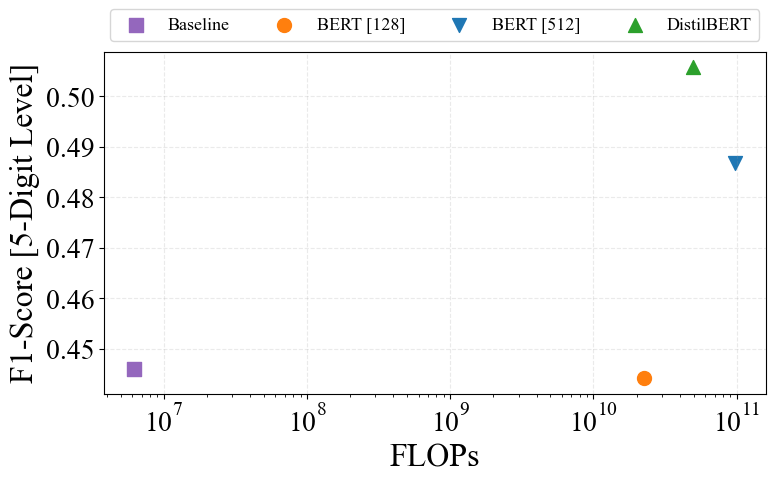

In [44]:
classifier = ['Baseline', 'BERT [128]', 'BERT [512]', 'DistilBERT']
f1_dig_3 = [ 0.44607299697656844, 0.4441763416477702, 0.48680619803476943, 0.5057530423280423]
flops_without_embedding = [6193025, 22618931200, 98006597632, 49367335936]
flops_with_embedding = [6193025, 28646440960, 122418626560, 73779364864]

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.style.use('default')
plt.rc('font',family='Times New Roman') 
plt.grid(visible=True, which='major', color='#999999', linestyle='--', alpha=0.2)

# Create a color gradient from blue to red

# for k in range(len(classifiers)):
#     for i, d in enumerate(data[k]):
#         plt.scatter(k, d, c=colors[i], cmap='Paired', vmin=0, vmax=1, marker= 'x', s = 100)

colors = ['#9467BD', '#FF7F0E', '#1F77B4', '#2CA02C']
markers = ['s', 'o', 'v', '^']

for i in range(len(flops_without_embedding)):
    plt.scatter(flops_without_embedding[i], f1_dig_3[i], color=colors[i], marker=markers[i], s=100, label=classifier[i])

plt.ylabel('F1-Score [3-Digit Level]', fontsize=23)
plt.xlabel('FLOPs', fontsize=23)
plt.xscale('log')
plt.xticks( fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=13, ncol = 4, bbox_to_anchor=(0.5,1.15), loc='upper center')
plt.tight_layout()

plt.savefig('/Users/evaengel/comparison_NLP_classification_models/reports/figures/flops_f1_3dig.pdf', bbox_inches='tight')
plt.show()

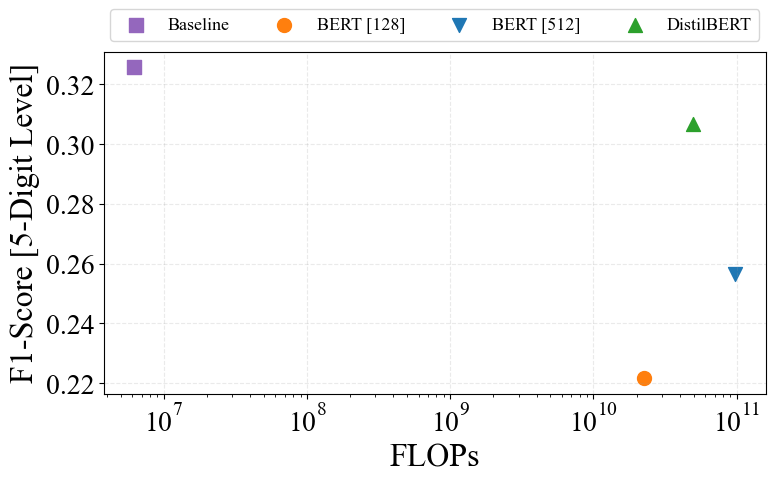

In [46]:
classifier = ['Baseline', 'BERT [128]', 'BERT [512]', 'DistilBERT']
f1_dig_5 = [ 0.3257058067593782, 0.22166272246272242, 0.2565918281453995, 0.3066147168968597]
flops_without_embedding = [6193025, 22618931200, 98006597632, 49367335936]
flops_with_embedding = [6193025, 28646440960, 122418626560, 73779364864]

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.style.use('default')
plt.rc('font',family='Times New Roman') 
plt.grid(visible=True, which='major', color='#999999', linestyle='--', alpha=0.2)

# Create a color gradient from blue to red

# for k in range(len(classifiers)):
#     for i, d in enumerate(data[k]):
#         plt.scatter(k, d, c=colors[i], cmap='Paired', vmin=0, vmax=1, marker= 'x', s = 100)

colors = ['#9467BD', '#FF7F0E', '#1F77B4', '#2CA02C']
markers = ['s', 'o', 'v', '^']

for i in range(len(flops_without_embedding)):
    plt.scatter(flops_without_embedding[i], f1_dig_5[i], color=colors[i], marker=markers[i], s=100, label=classifier[i])

plt.ylabel('F1-Score [5-Digit Level]', fontsize=23)
plt.xlabel('FLOPs', fontsize=23)
plt.xscale('log')
plt.xticks( fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=13, ncol = 4, bbox_to_anchor=(0.5,1.15), loc='upper center')
plt.tight_layout()

plt.savefig('/Users/evaengel/comparison_NLP_classification_models/reports/figures/flops_f1_5dig.pdf', bbox_inches='tight')
plt.show()